In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
cwd = os.getcwd()
print(cwd)

# For this to work, a copy of the original dataset must be saved as a CSV
main_dataset_path = cwd + "/MSF_Dataset_Complete_450.csv"
df = pd.read_csv(main_dataset_path)

C:\Users\Nick\Desktop\PROJECTS\MotherSignificantFeatureProject


I'm going to try and update Nick's previous helper function to classify this new dataset.

In [3]:
df.shape

(450, 325)

In [4]:
df.head()

,Mother_UID,1,2,3,4,5,6,7,8,9,...,Unnamed: 315,Unnamed: 316,Unnamed: 317,Unnamed: 318,Unnamed: 319,Unnamed: 320,Unnamed: 321,Unnamed: 322,Unnamed: 323,Unnamed: 324
0,1,29,59,60.0,156,25,12.5,0,31,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,24,54,56.0,145,26,12.5,0,28,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,28,62,65.0,151,28,11.5,0,31,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,25,49,52.0,151,22,11.5,0,30,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,21,39,42.0,151,18,10.1,0,25,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# the sample ID is useless to us, so for simplicity it will be dropped
del df['Mother_UID']

In [6]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,Unnamed: 315,Unnamed: 316,Unnamed: 317,Unnamed: 318,Unnamed: 319,Unnamed: 320,Unnamed: 321,Unnamed: 322,Unnamed: 323,Unnamed: 324
0,29,59,60.0,156,25,12.5,0,31,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,24,54,56.0,145,26,12.5,0,28,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,28,62,65.0,151,28,11.5,0,31,4,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25,49,52.0,151,22,11.5,0,30,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21,39,42.0,151,18,10.1,0,25,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There shouldn't be 324 columns, if memory serves correctly we should only have about 130.
It looks like the additional columns are mostly NaNs, so a null table will be created to see what's going on.

In [7]:
nulltable = df.isnull().sum()
pd.set_option('display.max_rows', None)
print (nulltable)

1                 0
2                 0
3               250
4                 0
5                 0
6                 0
7                 0
8                 0
9                 0
10                0
11                0
12              250
13                0
14              250
15                0
16                0
17                0
18                0
19                0
20                0
21                0
22                0
23                0
24                0
25                0
26                0
27                0
28                0
29                0
30                0
31                0
32                0
33                0
34                0
35                0
36                0
37                0
38                0
39                0
40                0
41                0
42                0
43                0
44                0
45                0
46                0
47                0
48                0
49                0
50                0


So we can see that anything after 130 are full of NaNs and therefore useless.
We'll drop them below.

In [8]:
df = df.dropna(axis = 1, how = 'all')

Now let's look at a preview of the dataset and the new null table. 

In [9]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,121,122,123,124,125,126,127,128,129,130
0,29,59,60.0,156,25,12.5,0,31,5,0,...,1,1,2.566,5,0,0,0,1,18,0
1,24,54,56.0,145,26,12.5,0,28,2,0,...,1,1,3.100,5,0,0,0,1,20,0
2,28,62,65.0,151,28,11.5,0,31,4,0,...,1,1,2.150,7,0,0,1,0,5,0
3,25,49,52.0,151,22,11.5,0,30,3,0,...,1,1,2.500,5,0,0,0,1,10,0
4,21,39,42.0,151,18,10.1,0,25,2,0,...,1,1,2.670,5,0,0,0,1,20,0


In [10]:
df = df.dropna(axis = 1, how = 'any')

# When we get to train_test split, there will be a problem because our label column (112) contains an errant value of 3. If we leave that in stratified splitting will not work, because there will be one group of one value, namely the aforementioned 3. To solve this, we will just drop that row from the whole data frame before making our X and y distinctions.


In [11]:
df = df[df['112'] != 3]

In [12]:
new_nulltable = df.isnull().sum()
pd.set_option('display.max_rows', None)
print (new_nulltable)

1      0
2      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
13     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
67     0
68     0
69     0
70     0
71     0
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
93     0
94     0
95     0
96     0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
111    0
112    0
114    0
115    0
116    0
117    0
119    0
120    0
121    0
122    0
123    0
124    0
125    0
126    0
127    0
128    0
129    0
130    0
dtype: int64


In [13]:
df.shape  #question: which columns specifically did we drop with that any null command?

(449, 108)

Since everything is in order, we can continue on with the next steps.

Now we'll try to use the helper function to transform the features that are categorical.

Import Nick's function, with a few changes made to match the new dataset codebook.

In [14]:
from MSFHelpFunc import *

In [15]:
codebook_path = cwd + "/MSF Dataset Codebook Updated.xlsx"
df_code = pd.read_excel(codebook_path, index_col = None, header = 1)

In [16]:
df_code.head()

,Variable Topic,Variable Name,Variable Label,Variable Type,Variable Unit\n(if Numeric),Variable Code List\n(if Coded)
0,Age_Of_Mother,1,mother's age,Numeric,Years,NaN
1,weight_before_preg,2,mother's weight before pregnancy,Numeric,kg,NaN
2,wt_before_delivery,3,mother's weight before delivery,Numeric,kg,NaN
3,Height(cm),4,mother's height,Numeric,cm,NaN
4,BMI,5,mother's BMI,Numeric,BMI,NaN


# Quick check for colinearity

In [17]:
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.stats import pearsonr
%matplotlib inline

In [18]:
corr_matrix = df.corr()

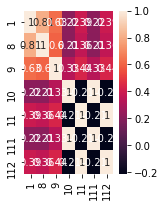

In [56]:
sn.heatmap(corr_matrix, annot=True)
plt.rcParams['figure.figsize'] = [5, 6]
plt.show()

In [20]:
#impossible to read this. Maybe we can just make a list of vars well correlated especially with our target variable?


In [57]:
cols_highly_corr_w_hypertension = []
for col in df.columns:
    print(f"Now checking column {col}")
    if abs(pearsonr(df[col], df['112'])[0]) >= .20 and col != '112':
        cols_highly_corr_w_hypertension.append(col)
    

Now checking column 1
Now checking column 2
Now checking column 4
Now checking column 5
Now checking column 6
Now checking column 7
Now checking column 8
Now checking column 9
Now checking column 10
Now checking column 11
Now checking column 13
Now checking column 15
Now checking column 16
Now checking column 17
Now checking column 18
Now checking column 19
Now checking column 20
Now checking column 21
Now checking column 22
Now checking column 23
Now checking column 24
Now checking column 25
Now checking column 26
Now checking column 27
Now checking column 28
Now checking column 29
Now checking column 30
Now checking column 31
Now checking column 32
Now checking column 33
Now checking column 34
Now checking column 35
Now checking column 36
Now checking column 37
Now checking column 38
Now checking column 39
Now checking column 40
Now checking column 41
Now checking column 42
Now checking column 43
Now checking column 44
Now checking column 45
Now checking column 46
Now checking column

C:\Users\Nick\anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [58]:
cols_highly_corr_w_hypertension

['1', '8', '9', '10', '11', '111']

In [59]:
cols_highly_corr_w_hypertension_plus_hypertension = cols_highly_corr_w_hypertension + ['112']

In [60]:
df_corr = df[cols_highly_corr_w_hypertension_plus_hypertension]

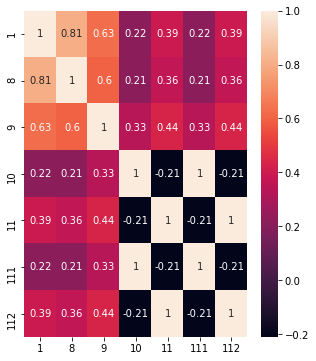

In [61]:
corr_matrix = df_corr.corr()
sn.heatmap(corr_matrix, annot=True)
plt.rcParams['figure.figsize'] = [2,3]
plt.show()

It is important to note that due to the format of the dataset the variable name column is useless. Instead we have to focus on the column number column.

First we'll distinct between labels and features.

In [26]:
labels = df['112']
features = df.drop('112', axis = 1)

In [27]:
print(features.shape)
print(labels.shape)

(449, 107)
(449,)


In [28]:
labels = pd.Series(labels)

In [29]:
df_code.shape

(130, 6)

In [30]:
removed_columns_Nans = ['3',
                        '12',
                        '14',
                        '57',   
                        '58',     
                        '59',     
                        '60',     
                        '61',     
                        '62',     
                        '63',     
                        '64',     
                        '65',     
                        '66',
                        '92',
                        '97',
                        '98',
                        '99',
                        '100',
                        '101',
                        '102',
                        '113',
                        '118',
                        '112'] ### included because it is target variable

In [31]:
df_code = df_code[~df_code['Variable Name'].isin(removed_columns_Nans)]

In [32]:
df_code.shape

(107, 6)

I can't get it to work at all, I keep getting a single indexer out of bounds error. I tried to write a helper function from scratch but I wasn't successful. 

Since we have a small enough dataset, I can just list the categorical variable numbers and pair them that way.

In [33]:
## Values are commented out because they were removed due to the 250 null values
cat_cols_list = ['7',
                '10',
                #'11', removed because extremely correlated with target variable.
                '13',
                '15',
                '16',
                '17',
                '18',
                '19',
                '20',
                '21',
                '22',
                '23',
                '24',
                '25',
                '26',
                '27',
                '28',
                '29',
                '30',
                '31',
                '32',
                '33',
                '34',
                '35',
                '36',
                '37',
                '38',
                '39',
                '40',
                '41',
                '42',
                '43',
                '44',
                '45',
                '46',
                '47',
                '48',
                '49',
                '50',
                '51',
                '52',
                '53',
                '54',
                '55',
                '56',
                #'57',
                #'58',
                #'59',
                #'60',
                #'61',
                #'62',
                #'63',
                #'64',
                #'65',
                #'66',
                '67',
                '68',
                '69',
                '70',
                '71',
                '72',
                '73',
                '74',
                '75',
                '76',
                '77',
                '78',
                '79',
                '80',
                '81',
                '82',
                '83',
                '84',
                '85',
                '86',
                '87',
                '88',
                '89',
                '90',
                '91',
                #'92',
                '93',
                '94',
                '95',
                '96',
                #'97',
                #'98',
                #'99',
                #'100',
                #'101',
                #'102',
                '103',
                '104',
                '105',
                '106',
                '107',
                '108',
                '109',
                '110',
                '111',
                ##'112', Removed because target variable
                #'113',
                '114',
                '115',
                '116',
                '117',
                #'118',
                '119',
                '120',
                '121',
                '125',
                '126',
                '127',
                '128',
                '130']

In [34]:
num_cols_list = ['1',
                 '2',
                 #'3',
                 '4',
                 '5',
                 '6',
                 '8',
                 '9',
                 #'12',
                 #'14',
                 '122',
                 '123',
                 '124',
                 '129']

In [35]:
cat_cols = df[cat_cols_list]
num_cols = df[num_cols_list]

In [36]:
cat_cols

,7,10,13,15,16,17,18,19,20,21,...,116,117,119,120,121,125,126,127,128,130
0,0,0,5,3,3,3,2,2,2,2,...,0,0,0,0,1,0,0,0,1,0
1,0,0,4,4,4,4,3,3,3,2,...,0,0,0,0,1,0,0,0,1,0
2,0,0,4,3,3,3,2,2,2,2,...,0,0,0,0,1,0,0,1,0,0
3,0,0,4,4,4,4,3,3,3,2,...,0,0,0,0,1,0,0,0,1,0
4,0,0,3,4,4,4,1,1,1,2,...,0,0,0,0,1,0,0,0,1,0
5,0,0,3,4,4,4,3,3,3,2,...,0,0,0,0,1,0,0,1,0,0
6,0,0,3,3,3,3,3,3,3,3,...,0,0,0,1,0,1,1,1,0,0
7,0,0,4,4,4,4,3,3,3,2,...,0,0,0,0,1,0,1,0,1,0
8,0,0,5,3,3,3,3,3,3,2,...,0,0,0,0,1,0,0,1,0,0
9,0,0,5,3,3,3,2,2,2,2,...,0,0,0,0,1,0,0,1,0,0


In [37]:
num_cols

,1,2,4,5,6,8,9,122,123,124,129
0,29,59,156,25,12.50,31,5,1,2.5660,5,18
1,24,54,145,26,12.50,28,2,1,3.1000,5,20
2,28,62,151,28,11.50,31,4,1,2.1500,7,5
3,25,49,151,22,11.50,30,3,1,2.5000,5,10
4,21,39,151,18,10.10,25,2,1,2.6700,5,20
5,32,56,156,24,10.50,38,8,1,2.5600,7,10
6,23,40,141,21,11.50,26,2,1,2.1000,7,18
7,23,52,159,21,12.50,27,2,1,2.5000,5,20
8,29,59,149,27,11.20,33,4,1,2.9400,7,12
9,28,69,156,29,12.90,31,4,1,2.9000,7,15


In [38]:
features_encoded = pd.get_dummies(features, columns = cat_cols_list)

In [39]:
features_encoded

,1,2,4,5,6,8,9,11,122,123,...,125_1,126_0,126_1,127_0,127_1,128_0,128_1,128_20,130_0,130_1
0,29,59,156,25,12.50,31,5,1,1,2.5660,...,0,1,0,1,0,0,1,0,1,0
1,24,54,145,26,12.50,28,2,0,1,3.1000,...,0,1,0,1,0,0,1,0,1,0
2,28,62,151,28,11.50,31,4,1,1,2.1500,...,0,1,0,0,1,1,0,0,1,0
3,25,49,151,22,11.50,30,3,1,1,2.5000,...,0,1,0,1,0,0,1,0,1,0
4,21,39,151,18,10.10,25,2,0,1,2.6700,...,0,1,0,1,0,0,1,0,1,0
5,32,56,156,24,10.50,38,8,1,1,2.5600,...,0,1,0,0,1,1,0,0,1,0
6,23,40,141,21,11.50,26,2,0,1,2.1000,...,1,0,1,0,1,1,0,0,1,0
7,23,52,159,21,12.50,27,2,0,1,2.5000,...,0,0,1,1,0,0,1,0,1,0
8,29,59,149,27,11.20,33,4,1,1,2.9400,...,0,1,0,0,1,1,0,0,1,0
9,28,69,156,29,12.90,31,4,1,1,2.9000,...,0,1,0,0,1,1,0,0,1,0


In [40]:
X = features_encoded
y = labels

In [41]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

In [42]:
X_nulltable = X.isnull().sum()
pd.set_option('display.max_rows', None)
print (X_nulltable)

1         0
2         0
4         0
5         0
6         0
8         0
9         0
11        0
122       0
123       0
124       0
129       0
7_0       0
7_1       0
10_0      0
10_1      0
13_0      0
13_1      0
13_2      0
13_3      0
13_4      0
13_5      0
13_6      0
15_1      0
15_2      0
15_3      0
15_4      0
16_1      0
16_2      0
16_3      0
16_4      0
17_1      0
17_2      0
17_3      0
17_4      0
18_1      0
18_2      0
18_3      0
18_4      0
19_1      0
19_2      0
19_3      0
19_4      0
20_1      0
20_2      0
20_3      0
20_4      0
21_1      0
21_2      0
21_3      0
21_4      0
22_1      0
22_2      0
22_3      0
22_4      0
23_1      0
23_2      0
23_3      0
23_4      0
24_1      0
24_2      0
24_3      0
25_1      0
25_2      0
25_3      0
26_1      0
26_2      0
26_3      0
27_1      0
27_2      0
28_1      0
28_2      0
29_1      0
29_2      0
30_1      0
30_2      0
31_1      0
31_2      0
32_1      0
32_2      0
33_1      0
33_2      0
33_3      0
34_1

In [43]:
number_of_desired_vars = 10
selector = SelectKBest(score_func = chi2, k= number_of_desired_vars)
fit = selector.fit(X, y)

selectedcols = selector.get_support(indices=True)

X = X.iloc[:,selectedcols]

w = zip(features_encoded.columns, fit.scores_)

list_of_vars = list(w)

list_of_vars.sort(key = lambda x:x[1], reverse = True)

for i in range(number_of_desired_vars):
    coded_label = list_of_vars[i][0]
    print(coded_label)
    print('*******************************')

11
*******************************
9
*******************************
1
*******************************
8
*******************************
2
*******************************
129
*******************************
10_1
*******************************
111_1
*******************************
104_4
*******************************
89_2
*******************************


# TODO Add decoder to figure out what these columns specifically are:

In [44]:
print("In our data set, {} subjects have some form of hypertension.".format(len(X[y==1])))
print("In our data set, {} subjects have no form of hypertension.".format(len(X[y==0])))

In our data set, 220 subjects have some form of hypertension.
In our data set, 229 subjects have no form of hypertension.


In [45]:
yes_h = len(X[y==1])
no_h = len(X[y==0])
total_h = yes_h + no_h
print("A hypothetical model that simply predicted no-hypertension would be accurate {:.2%} of the time.".format(no_h / total_h))

A hypothetical model that simply predicted no-hypertension would be accurate 51.00% of the time.


In [46]:
y.value_counts

<bound method IndexOpsMixin.value_counts of 0      1
1      0
2      1
3      1
4      0
5      1
6      0
7      0
8      1
9      1
10     0
11     0
12     0
13     1
14     0
15     1
16     1
17     0
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     0
26     0
27     1
28     1
29     1
30     0
31     0
32     0
33     0
34     1
35     1
36     0
37     0
38     0
39     1
40     0
41     0
42     1
43     1
44     0
45     0
46     1
47     1
48     0
49     1
50     1
51     1
52     1
53     0
54     0
55     1
56     1
57     0
58     0
59     1
60     1
61     1
62     1
63     0
64     0
65     0
66     1
67     0
68     0
69     0
70     0
71     0
72     1
73     0
74     0
75     1
76     0
77     0
78     1
79     0
80     1
81     1
82     0
83     1
84     1
85     0
86     0
87     1
88     0
89     0
90     1
91     0
92     0
93     0
94     0
95     1
96     0
97     1
98     1
99     1
100    1
101    1
102    1
103    0
104    0
105    1
10

In [47]:
y.shape
X.shape

(449, 10)

In [48]:
y.value_counts()

0    229
1    220
Name: 112, dtype: int64

In [49]:
 y = y[y != 3]

In [50]:
y.value_counts()

0    229
1    220
Name: 112, dtype: int64

## Random Forest Model

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.3333, random_state = 42) 

In [52]:
from datetime import datetime # for timing algorithms

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix # to create a confusion matrix
from sklearn.metrics import plot_confusion_matrix # to draw a confusion matrix
from sklearn.model_selection import GridSearchCV # to try out different hyperparameters


rf_class = RandomForestClassifier(criterion = 'gini',) #note, deleted the num of estimators. We will use the gridsearch to find that.


#let's make this a little smarter.
clf_cv = GridSearchCV(rf_class, {
    'n_estimators': [2, 10, 50, 100],
    'max_depth': [None, 2, 5, 10, 100],
    'min_samples_split': [5, 10, 20],
    'max_features': ['auto', 5, 10],
    'bootstrap': [True, False],
    'n_jobs': [-1]
}, cv=5)

print(f'operation started at {datetime.now()}')
start = datetime.now()
clf_cv.fit(X_train, y_train)
results = pd.DataFrame(clf_cv.cv_results_)
print(f'operation completed at {datetime.now()}')
print(f'that took {datetime.now()-start}')
results
results[['param_bootstrap', 'param_max_depth', 'param_max_features',
       'param_min_samples_split', 'param_n_estimators', 'param_n_jobs', 'mean_test_score']]

operation started at 2021-11-06 22:17:45.810779
operation completed at 2021-11-06 22:19:09.979338
that took 0:01:24.168559


,param_bootstrap,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators,param_n_jobs,mean_test_score
0,True,None,auto,5,2,-1,0.952414
1,True,None,auto,5,10,-1,0.993333
2,True,None,auto,5,50,-1,1.000000
3,True,None,auto,5,100,-1,1.000000
4,True,None,auto,10,2,-1,0.959080
5,True,None,auto,10,10,-1,1.000000
6,True,None,auto,10,50,-1,1.000000
7,True,None,auto,10,100,-1,1.000000
8,True,None,auto,20,2,-1,0.973333
9,True,None,auto,20,10,-1,0.993333


# I'm seeing an absurdly high number of perfect scores... not sure what's going on here.

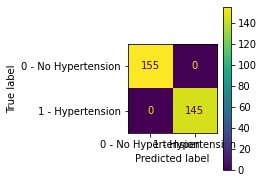

In [54]:
plot_confusion_matrix(clf_cv, 
                      X_test, 
                      y_test, 
                      display_labels=["0 - No Hypertension", "1 - Hypertension"])

In [55]:
plot_confusion_matrix(rf_class, 
                      X_test, 
                      y_test, 
                      display_labels=["0 - No Hypertension", "1 - Hypertension"])

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

Not sure where the extra column comes from

In [ ]:
X.columns

I'm a bit confused now as these columns don't correspond to the ones listed after the selectKBest algorithm.
I'll look into it more tonight/tomorrow morning.